In [ ]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

data_dir = '/content/content/MyDrive/data'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'feature_details_analysis.xlsx',
 'data_description.txt',
 'feature_classification.csv',
 'train_refined - Copy.csv',
 'feature_classification - Copy.csv',
 'train_refined.csv',
 'train_refined - Copy (2).csv',
 'train_refined_numeric.csv',
 'titanic']

In [ ]:
data_dir = '/content/content/MyDrive/data/titanic'
os.chdir(data_dir)
os.listdir()

['train.csv', 'gender_submission.csv', 'test.csv', 'titanic.zip']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# __Introduction to classification__
- Machine learning addresses a variety of problems, employing specific techniques for reliable predictions.  
- One key technique is classification, which categorizes or groups items based on their features.  
- Classification algorithms identify patterns to assign instances to predefined categories.  
- It solves problems like determining spam emails, identifying tumor types, or classifying animals.  

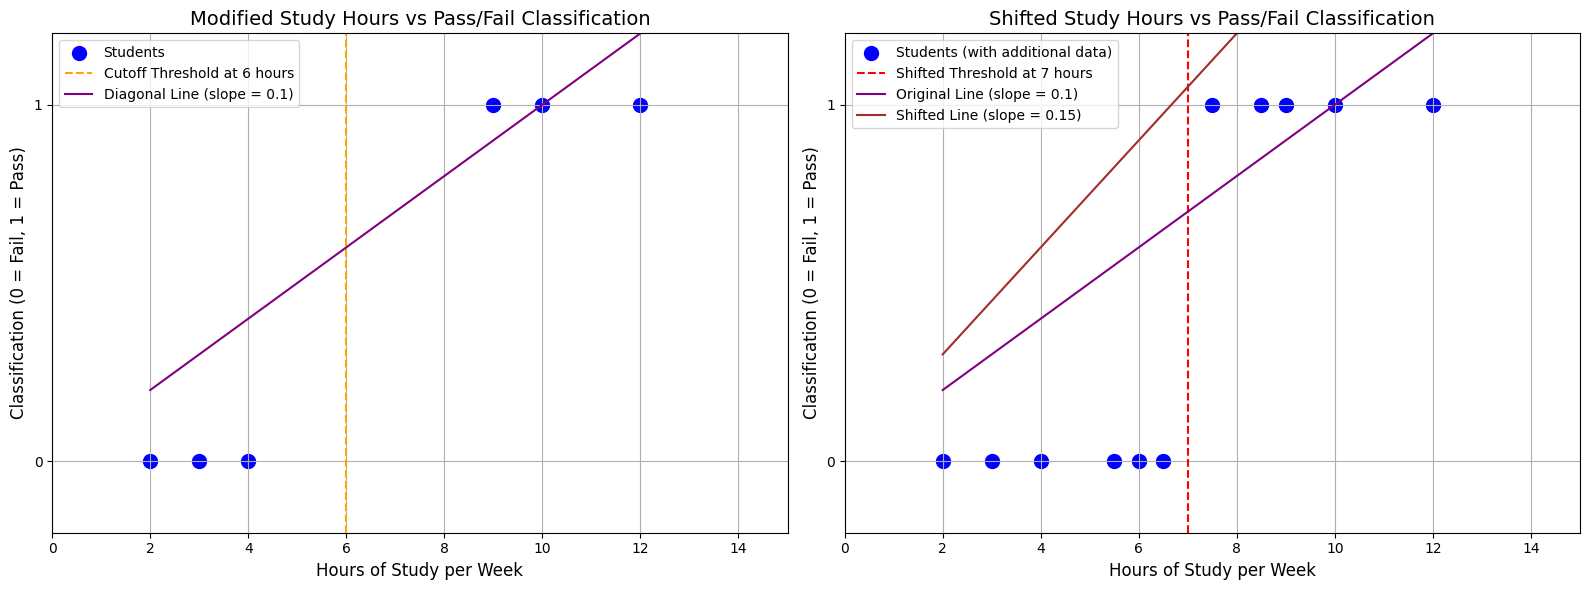

In [ ]:
# Data: Original hours of study per week and corresponding classification
hours_of_study = [2, 3, 4, 9, 10, 12]  # Example study hours
classification = [0, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass

# Additional data points for second subplot
additional_hours_of_study = [5.5, 6, 6.5, 7.5, 8.5]  # New study hours with overlapping cutoff
additional_classification = [0, 0, 0, 1, 1]  # New classification

# Combine original and new data for the second plot
combined_hours = hours_of_study + additional_hours_of_study
combined_classification = classification + additional_classification

# Regression lines
slope_original = 0.1  # Original diagonal line slope
slope_shifted = 0.15  # Adjusted diagonal line slope for the new threshold (shifted to 7 hours)

# Line values for original regression line
line_x = range(min(hours_of_study), max(hours_of_study) + 1)
line_y_original = [slope_original * x for x in line_x]

# Line values for shifted regression line
line_y_shifted = [slope_shifted * x for x in line_x]

# Define consistent x and y axis limits
x_min, x_max = 0, 15  # Consistent range for x-axis
y_min, y_max = -0.2, 1.2  # Consistent range for y-axis to display points and lines

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First Subplot: Modified plot
ax[0].scatter(hours_of_study, classification, color='blue', s=100, label='Students')
ax[0].axvline(x=6, color='orange', linestyle='--', label='Cutoff Threshold at 6 hours')
ax[0].plot(line_x, line_y_original, color='purple', linestyle='-', label=f'Diagonal Line (slope = {slope_original})')
ax[0].set_title('Modified Study Hours vs Pass/Fail Classification', fontsize=14)
ax[0].set_xlabel('Hours of Study per Week', fontsize=12)
ax[0].set_ylabel('Classification (0 = Fail, 1 = Pass)', fontsize=12)
ax[0].set_yticks([0, 1])
ax[0].set_xlim(x_min, x_max)  # Apply consistent x-axis scale
ax[0].set_ylim(y_min, y_max)  # Apply consistent y-axis scale
ax[0].legend()
ax[0].grid(True)

# Second Subplot: Impact of shifted cutoff
ax[1].scatter(combined_hours, combined_classification, color='blue', s=100, label='Students (with additional data)')
ax[1].axvline(x=7, color='red', linestyle='--', label='Shifted Threshold at 7 hours')
ax[1].plot(line_x, line_y_original, color='purple', linestyle='-', label=f'Original Line (slope = {slope_original})')
ax[1].plot(line_x, line_y_shifted, color='brown', linestyle='-', label=f'Shifted Line (slope = {slope_shifted})')
ax[1].set_title('Shifted Study Hours vs Pass/Fail Classification', fontsize=14)
ax[1].set_xlabel('Hours of Study per Week', fontsize=12)
ax[1].set_ylabel('Classification (0 = Fail, 1 = Pass)', fontsize=12)
ax[1].set_yticks([0, 1])
ax[1].set_xlim(x_min, x_max)  # Apply consistent x-axis scale
ax[1].set_ylim(y_min, y_max)  # Apply consistent y-axis scale
ax[1].legend()
ax[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# __Logistic regression__
- Logistic regression estimates probabilities, making it ideal for solving binary classification problems.  
- It uses the logistic function \( g(z) \) to map values between 0 and 1.  
- The algorithm relies on a decision boundary, often set at a threshold of 0.5.  
- It minimizes the log-loss (cross-entropy) function to improve accuracy during training.  
- Logistic regression adapts seamlessly to changes in data or thresholds, ensuring reliable predictions.  
- The sigmoid curve \( g(z) \) models probabilities with a smooth "S-shaped" transition.  
- High \( z \) values push outputs near 1; low \( z \) values near 0.  
- It serves as the foundation for more advanced classification models in machine learning.


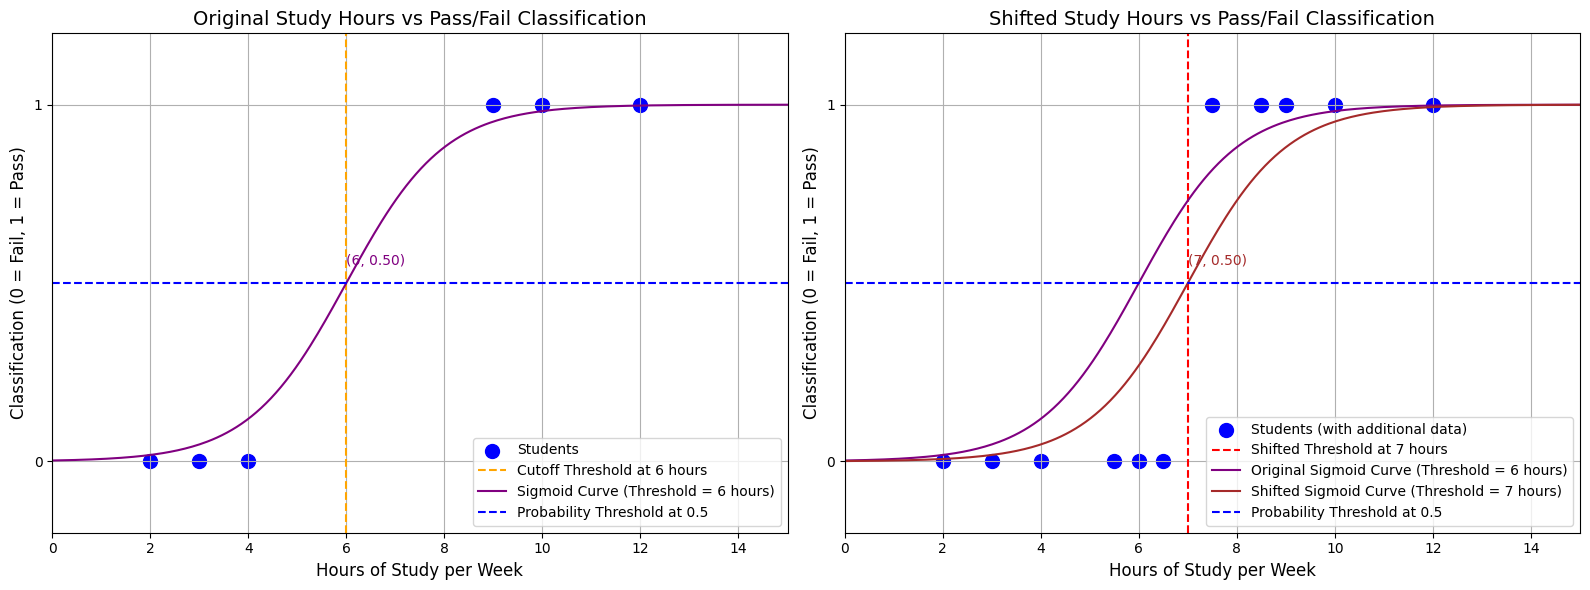

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data: Original hours of study per week and corresponding classification
hours_of_study = [2, 3, 4, 9, 10, 12]  # Example study hours
classification = [0, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass

# Additional data points for second subplot
additional_hours_of_study = [5.5, 6, 6.5, 7.5, 8.5]  # New study hours with overlapping cutoff
additional_classification = [0, 0, 0, 1, 1]  # New classification

# Combine original and new data for the second plot
combined_hours = hours_of_study + additional_hours_of_study
combined_classification = classification + additional_classification

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Values for plotting sigmoid curves
x_vals = np.linspace(0, 15, 300)  # X-axis range for smooth sigmoid curve
sigmoid_original = sigmoid(x_vals - 6)  # Original decision boundary at 6 hours
sigmoid_shifted = sigmoid(x_vals - 7)  # Shifted decision boundary at 7 hours

# Define consistent x and y axis limits
x_min, x_max = 0, 15  # Consistent range for x-axis
y_min, y_max = -0.2, 1.2  # Consistent range for y-axis

# Intersection points for sigmoid curves at y = 0.5 (probability threshold)
original_intersection_x = 6  # x-value for original sigmoid curve
shifted_intersection_x = 7  # x-value for shifted sigmoid curve
intersection_y = 0.5  # y-value for the threshold

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First Subplot: Original Sigmoid Decision Boundary
ax[0].scatter(hours_of_study, classification, color='blue', s=100, label='Students')
ax[0].axvline(x=6, color='orange', linestyle='--', label='Cutoff Threshold at 6 hours')
ax[0].plot(x_vals, sigmoid_original, color='purple', linestyle='-', label='Sigmoid Curve (Threshold = 6 hours)')
ax[0].axhline(y=0.5, color='blue', linestyle='--', label='Probability Threshold at 0.5')  # Colored horizontal line
ax[0].text(original_intersection_x, intersection_y + 0.05, f'({original_intersection_x}, {intersection_y:.2f})', color='purple')  # Intersection point label
ax[0].set_title('Original Study Hours vs Pass/Fail Classification', fontsize=14)
ax[0].set_xlabel('Hours of Study per Week', fontsize=12)
ax[0].set_ylabel('Classification (0 = Fail, 1 = Pass)', fontsize=12)
ax[0].set_yticks([0, 1])
ax[0].set_xlim(x_min, x_max)  # Apply consistent x-axis scale
ax[0].set_ylim(y_min, y_max)  # Apply consistent y-axis scale
ax[0].legend()
ax[0].grid(True)

# Second Subplot: Shifted Sigmoid Decision Boundary
ax[1].scatter(combined_hours, combined_classification, color='blue', s=100, label='Students (with additional data)')
ax[1].axvline(x=7, color='red', linestyle='--', label='Shifted Threshold at 7 hours')
ax[1].plot(x_vals, sigmoid_original, color='purple', linestyle='-', label='Original Sigmoid Curve (Threshold = 6 hours)')
ax[1].plot(x_vals, sigmoid_shifted, color='brown', linestyle='-', label='Shifted Sigmoid Curve (Threshold = 7 hours)')
ax[1].axhline(y=0.5, color='blue', linestyle='--', label='Probability Threshold at 0.5')  # Colored horizontal line
ax[1].text(shifted_intersection_x, intersection_y + 0.05, f'({shifted_intersection_x}, {intersection_y:.2f})', color='brown')  # Intersection point label
ax[1].set_title('Shifted Study Hours vs Pass/Fail Classification', fontsize=14)
ax[1].set_xlabel('Hours of Study per Week', fontsize=12)
ax[1].set_ylabel('Classification (0 = Fail, 1 = Pass)', fontsize=12)
ax[1].set_yticks([0, 1])
ax[1].set_xlim(x_min, x_max)  # Apply consistent x-axis scale
ax[1].set_ylim(y_min, y_max)  # Apply consistent y-axis scale
ax[1].legend()
ax[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Sigmoid Function the logistic function**
$$\boxed{\boldsymbol{g(z) = \frac{1}{1 + e^{-z}}}}$$
$$0 < g(z) < 1$$

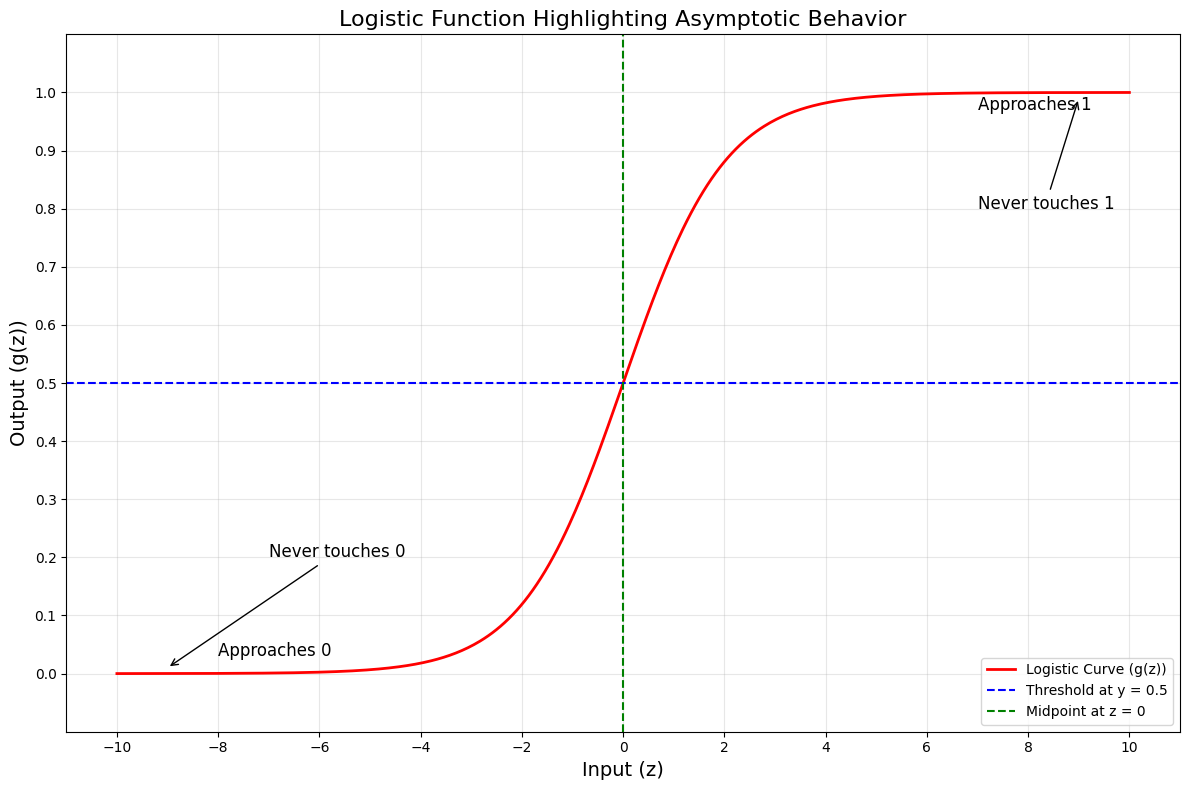

In [ ]:
# Logistic (sigmoid) function renamed to g(z)
def g(z):
    return 1 / (1 + np.exp(-z))

# Z values for the plot
z_vals = np.linspace(-10, 10, 500)  # Range from -10 to 10 for smooth curve
g_vals = g(z_vals)  # Apply logistic function

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(z_vals, g_vals, color='red', linewidth=2, label='Logistic Curve (g(z))')

# Add threshold and midpoint lines
plt.axhline(y=0.5, color='blue', linestyle='--', label='Threshold at y = 0.5')  # Threshold line at 0.5
plt.axvline(x=0, color='green', linestyle='--', label='Midpoint at z = 0')  # Midpoint line at z=0

# Annotate behavior near 0 and 1 with zoom emphasis
plt.text(-8, 0.03, 'Approaches 0', fontsize=12, color='black')
plt.text(7, 0.97, 'Approaches 1', fontsize=12, color='black')
plt.annotate('Never touches 0',
             xy=(-9, 0.01), xytext=(-7, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.annotate('Never touches 1',
             xy=(9, 0.99), xytext=(7, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Adjust axis limits to zoom out slightly beyond 0 and 1 for clarity
plt.title('Logistic Function Highlighting Asymptotic Behavior', fontsize=16)
plt.xlabel('Input (z)', fontsize=14)
plt.ylabel('Output (g(z))', fontsize=14)
plt.xticks(np.arange(-10, 11, 2))  # X-axis ticks from -10 to 10
plt.yticks(np.linspace(0, 1, 11))  # Y-axis ticks for better granularity
plt.ylim(-0.1, 1.1)  # Further extend y-axis limits to emphasize asymptotes
plt.grid(alpha=0.3)  # Light grid for clarity
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

**Using linear regression formula in sigmoid**
$$f_{\vec{w}, b}\vec{(x)} = \vec{w}\cdot\vec{x} + b$$
$$\Downarrow$$
$$z = \vec{w}\cdot\vec{x} + b$$
$$\Downarrow$$
$$g(\vec{w}\cdot\vec{x} + b) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}}$$
$$\Downarrow$$
$$f_{\vec{w}, b}\vec{(x)} = g(\vec{w}\cdot\vec{x} + b) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}}$$



# **Deicsion boudnary**
- Logistic regression defines a decision boundary where predictions transition between different output classes.  
- The sigmoid function outputs probabilities, mapping input values into a range between 0 and 1.  
- A threshold, typically 0.5, determines whether the model predicts \( y = 1 \) or \( y = 0 \).  


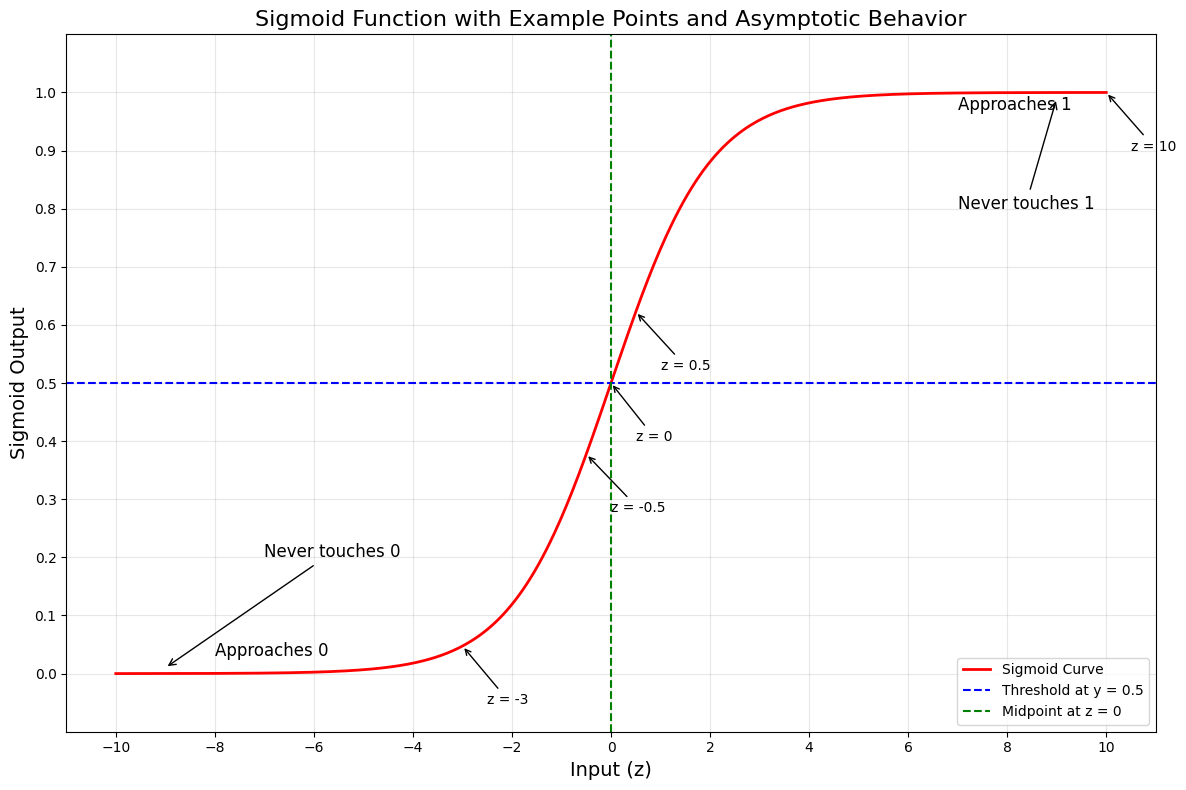

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(value):
    return 1 / (1 + np.exp(-value))

# Generate smooth input values for the plot
x_vals = np.linspace(-10, 10, 500)  # Range from -10 to 10 for smooth curve
y_vals = sigmoid(x_vals)  # Apply sigmoid function

# Example input values for annotation
example_values = [0.5, 0, -0.5, 10, -3]
example_outputs = [sigmoid(val) for val in example_values]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Sigmoid Curve')

# Add threshold and midpoint lines
plt.axhline(y=0.5, color='blue', linestyle='--', label='Threshold at y = 0.5')  # Threshold line at 0.5
plt.axvline(x=0, color='green', linestyle='--', label='Midpoint at z = 0')  # Midpoint line at x=0

# Annotate specific values on the graph
for i, val in enumerate(example_values):
    plt.annotate(f'z = {val}',
                 xy=(val, example_outputs[i]),
                 xytext=(val + 0.5, example_outputs[i] - 0.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

# Annotate asymptotic behavior
plt.text(-8, 0.03, 'Approaches 0', fontsize=12, color='black')
plt.text(7, 0.97, 'Approaches 1', fontsize=12, color='black')
plt.annotate('Never touches 0',
             xy=(-9, 0.01), xytext=(-7, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.annotate('Never touches 1',
             xy=(9, 0.99), xytext=(7, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Customize the graph appearance
plt.title('Sigmoid Function with Example Points and Asymptotic Behavior', fontsize=16)
plt.xlabel('Input (z)', fontsize=14)
plt.ylabel('Sigmoid Output', fontsize=14)
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.linspace(0, 1, 11))
plt.ylim(-0.1, 1.1)  # Adjust axis limits for clarity
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

**Euler number e**
* $e = 1 + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} + \dots$
* Alternatively, \( e \) can be represented as:
* $e = \sum_{n=0}^{\infty} \frac{1}{n!}$



**Sovling for z = 9**
* $g(z) = \frac{1}{1 + e^{-z}}$
* $g(z) = \frac{1}{1 + e^{-9}}$
* $\boxed{g(z) = \frac{1}{1 + e^{\frac{1}{9}}}}$
* $g(z) = \frac{1}{1 + e^{0.11}}$
* $g(z) = \frac{1}{1 + 1.117}$
* $g(z) = \frac{1}{2.117}$
* $g(z) = .99$

**Sovling for z = -6**
* $g(z) = \frac{1}{1 + e^{-z}}$
* $g(z) = \frac{1}{1 + e^{-(-6)}}$
* $g(z) = \frac{1}{1 + e^{6}}$
* $g(z) = \frac{1}{1 + 403.428}$
* $g(z) = \frac{1}{404.428}$
* $g(z) = .0024$

# __Loss function for logistic regression__
- The loss function quantifies how far the model's predictions deviate from true labels.  
- It serves as an optimization metric, minimizing errors during the training process for better accuracy.  
- Mean squared error (MSE) is commonly used for regression; larger errors are penalized heavily __but not suitable for logistic regression.__
- Logistic regression employs __log loss also called Corss-entropyy__, assessing predicted probabilities and penalizing incorrect confidence levels.  
- __Cross-entropy__ loss is ideal for __binary classification__, rewarding correct predictions and minimizing errors.  


* __Log Loss__ $
L(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) =
\left\{
\begin{array}{l}
-\log(f_{\vec{w},b}(\vec{x}^{(i)})) \ \ \ \ \text{if } y^{(i)} = 1 \\[12pt]
-\log(1 - f_{\vec{w},b}(\vec{x}^{(i)})) \ \ \ \text{if } y^{(i)} = 0
\end{array}
\right.
$

* __Simplified log loss__ $
L(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) = -y^{(i)} \cdot \log(f_{\vec{w},b}(\vec{x}^{(i)})) - (1-y^{(i)}) \cdot \log(1-f_{\vec{w},b}(\vec{x}^{(i)}))
$

# __Cost function and Gradient Descent for logistic regression__

**Cost Function**  
- Aggregates individual losses across the dataset to evaluate overall model performance.  
- Represents the average or sum of errors to quantify prediction accuracy comprehensively.  
- Acts as a guiding metric for optimizing weights and bias during model training.  
- Minimizing the cost function improves predictions and enhances generalization to unseen data.  
* $
J(\vec{w}, b) = \frac{1}{m} \sum_{i=1}^{m} \left( -y^{(i)} \cdot \log(f_{\vec{w},b}(\vec{x}^{(i)})) - (1-y^{(i)}) \cdot \log(1-f_{\vec{w},b}(\vec{x}^{(i)})) \right)
$

**Gradient Descent in Logistic Regression**  
- Iteratively updates weight vector and bias to minimize the cost function systematically.  
- Uses the sigmoid function, introducing non-linearity for probabilities in logistic regression.  
- Partial derivatives guide parameter updates in the opposite direction of steepest ascent.  
- Complex derivations simplify during implementation, making differences more intuitive later.  

* Gradient Descent
  
  * $
w_j = w_j - \alpha \cdot \frac{\partial J(\vec{w}, b)}{\partial w_j}
$ where $
\frac{\partial J(\vec{w}, b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} \right)
$
    * Where ${j}$ = 1, 2, 3, ..., n
  * $
b = b - \alpha \cdot \frac{\partial J(\vec{w}, b)}{\partial b}
$ Where $
\frac{\partial J(\vec{w}, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right)
$
* Gradient descent after replacing derivative
  * $w_j = w_j - \alpha \cdot\left[\frac{1}{m} \sum_{i=1}^{m} \left( \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} \right)\right]
$
  * $
b = b - \alpha \cdot\left[\frac{1}{m} \sum_{i=1}^{m} \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right)\right]
$

* Linear Regression $f_{\vec{w}, b}\vec{(x)} = \vec{w}\cdot\vec{x} + b$
* Logistic Regression $f_{\vec{w}, b}\vec{(x)} = g(\vec{w}\cdot\vec{x} + b) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}}$

# __Titanic Survival Insights Data download__
- Use Kaggle’s Titanic dataset to apply logistic regression knowledge to predict passenger survivability.  
- Login to Kaggle, navigate to Competitions, filter by Getting Started, and join Titanic competition.  
- Download data files, upload them to Google Drive, and organize in a dedicated Titanic folder.  
- Extract zipped files in Google Drive and move them to the Titanic folder for easier access.  
- Set up file path in the notebook, use `os.chdir` to change directories, and verify files with `os.listdir`.  

# __One Hot Encoding__
- One-hot encoding converts categorical features into binary columns, creating separate columns for each category.  
- It ensures categorical data is represented numerically for machine learning models to process effectively.  
- Using the Sex column, create two binary columns: Sex_female and Sex_male for each gender.  
- One-hot encoding transforms features like Pclass into distinct three binary columns for each unique value.  
- Use Pandas `get_dummies()` method for an efficient and seamless one-hot encoding process.  
- Specify `dtype=int` in `get_dummies()` to ensure binary columns use 0 and 1 instead of True/False.  

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
drop_col = ['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
df_train.drop(columns=drop_col, inplace=True)
df_test.drop(columns=drop_col, inplace=True)

In [ ]:
df_train_one_hot = pd.get_dummies(df_train['Sex'], prefix='Sex', dtype=int)
df_train_one_hot.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
df_train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [ ]:
df_train_one_hot = pd.get_dummies(df_train['Pclass'], prefix='Pclass', dtype=int)
df_train_one_hot.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


# __Data preparation for model__
- Perform null analysis to identify missing values in columns such as Age and Embarked.  
- Replace missing values in Age with the median to ensure unbiased and robust substitution.  
- Use mode with `[0]` for Embarked to correctly fill missing values with the most frequent category.  
- Convert Age into categories via binning, grouping values into defined intervals for better analysis.  

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
Embarked        0
dtype: int64


In [ ]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
Embarked       0
dtype: int64


<ipython-input-16-b25d6bd1ec00>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
<ipython-input-16-b25d6bd1ec00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
df_train['Embarked'].mode()

,Embarked
0,S


In [ ]:
bins = [0, 14, 60, 100]
labels = ['Child', 'Adult', 'Senior']
# Apply binning
df_train['Age_Binned'] = pd.cut(df_train['Age'], bins=bins, labels=labels)
df_test['Age_Binned'] = pd.cut(df_test['Age'], bins=bins, labels=labels)
print(df_train.head(10))
print(df_test.head(10))

   PassengerId  Survived  Pclass     Sex   Age Embarked Age_Binned
0            1         0       3    male  22.0        S      Adult
1            2         1       1  female  38.0        C      Adult
2            3         1       3  female  26.0        S      Adult
3            4         1       1  female  35.0        S      Adult
4            5         0       3    male  35.0        S      Adult
5            6         0       3    male  28.0        Q      Adult
6            7         0       1    male  54.0        S      Adult
7            8         0       3    male   2.0        S      Child
8            9         1       3  female  27.0        S      Adult
9           10         1       2  female  14.0        C      Child
   PassengerId  Pclass     Sex   Age Embarked Age_Binned
0          892       3    male  34.5        Q      Adult
1          893       3  female  47.0        S      Adult
2          894       2    male  62.0        Q     Senior
3          895       3    male  27.

In [ ]:
one_hot_features = ['Pclass', 'Sex', 'Embarked', 'Age_Binned']
df_train_1hot = pd.DataFrame()
df_test_1hot = pd.DataFrame()

for feature in one_hot_features:
    # One-hot encode for train data
    one_hot_train = pd.get_dummies(df_train[feature], prefix=feature, dtype=int)
    df_train_1hot = pd.concat([df_train_1hot, one_hot_train], axis=1)

    # One-hot encode for test data
    one_hot_test = pd.get_dummies(df_test[feature], prefix=feature, dtype=int)
    df_test_1hot = pd.concat([df_test_1hot, one_hot_test], axis=1)

In [ ]:
df_train_1hot

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Binned_Child,Age_Binned_Adult,Age_Binned_Senior
0,0,0,1,0,1,0,0,1,0,1,0
1,1,0,0,1,0,1,0,0,0,1,0
2,0,0,1,1,0,0,0,1,0,1,0
3,1,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1,0,1,0
887,1,0,0,1,0,0,0,1,0,1,0
888,0,0,1,1,0,0,0,1,0,1,0
889,1,0,0,0,1,1,0,0,0,1,0


In [ ]:
df_test_1hot

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Binned_Child,Age_Binned_Adult,Age_Binned_Senior
0,0,0,1,0,1,0,1,0,0,1,0
1,0,0,1,1,0,0,0,1,0,1,0
2,0,1,0,0,1,0,1,0,0,0,1
3,0,0,1,0,1,0,0,1,0,1,0
4,0,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,1,0,1,0,0,1,0,1,0
414,1,0,0,1,0,1,0,0,0,1,0
415,0,0,1,0,1,0,0,1,0,1,0
416,0,0,1,0,1,0,0,1,0,1,0


In [ ]:
df_train_1hot['Survived'] = df_train['Survived']
df_train_1hot.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Binned_Child,Age_Binned_Adult,Age_Binned_Senior,Survived
0,0,0,1,0,1,0,0,1,0,1,0,0
1,1,0,0,1,0,1,0,0,0,1,0,1
2,0,0,1,1,0,0,0,1,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,1,0,1,0,0


# __Model1 for binary classification__
- The binary_classification function implements logistic regression using algorithms discussed in earlier lectures.  
- It converts target variable `Y` from Pandas Series to NumPy array for compatibility.  
- We initialize weights `w` and bias `b` as zeros, tracking costs in an empty list.  
- Sigmoid function transforms `Z`, the linear combination, into probabilities for logistic regression.  
- Cost is computed via log-loss; derivatives adjust `w` and `b` using gradient descent optimization.  

In [ ]:
def binary_classification(X, Y, learning_rate=0.01, epochs=1000):
    """
    Perform binary classification using vectorized dot product.
    Parameters:
        X - Input features (shape: m x n, where m is the number of samples and n is the features).
        Y - Target labels (shape: m x 1, values 0 or 1).
        learning_rate - Learning rate for gradient descent.
        epochs - Number of iterations.
    Returns:
        final_cost - Final value of the cost function after training.
        accuracy - Model accuracy on the training data.
        y_pred - Predictions after training (values 0 or 1).
        costs - List of cost values over epochs for tracking performance.
    """

    # Ensure Y is a column vector
    if isinstance(Y, pd.Series):  # Check if Y is a Pandas Series
        Y = Y.to_numpy()          # Convert to NumPy array
    if Y.ndim == 1:               # Check if Y is 1-dimensional
        Y = Y.reshape(-1, 1)      # Reshape to (m, 1)

    # Initialize weights and bias
    m, n = X.shape  # Number of samples (m), Number of features (n)
    w = np.zeros((n, 1))  # Initialize weights to zero (shape: n x 1)
    b = 0  # Initialize bias to zero

    costs = []  # List to store cost values per epoch

    # Sigmoid function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # Training through gradient descent
    for epoch in range(epochs):
        # Forward Propagation
        Z = np.dot(X, w) + b  # Linear combination of inputs
        A = sigmoid(Z)        # Apply sigmoid to get predictions
        cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # Binary cross-entropy loss

        # Backward Propagation (Gradient computation)
        dw = np.dot(X.T, (A - Y)) / m  # Gradient with respect to weights
        db = np.sum(A - Y) / m         # Gradient with respect to bias

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Track cost
        costs.append(cost)  # Store cost for each epoch

        # Conditional Logging
        if epochs <= 100:
            if epoch % 20 == 0:
                print(f"Epoch {epoch}, Cost: {cost}")
        elif 100 < epochs <= 501:
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost}")
        elif 501 < epochs <= 1001:
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost}")
        elif epochs > 1001:
            pass  # No display for epochs > 1001

    # Final Predictions
    Z_final = np.dot(X, w) + b
    y_pred = (sigmoid(Z_final) >= 0.5).astype(int)  # Convert probabilities to 0 or 1

    # Accuracy
    accuracy = np.mean(y_pred == Y) * 100  # Calculate accuracy in percentage

    return cost, accuracy, y_pred, costs

# __Accuracy and Cost for classification__
- Logistic regression tracks cost to optimize predictions and accuracy to measure classification performance.  
- Binary cross-entropy evaluates how predicted probabilities align with true labels, guiding model improvement.  
- Linear regression primarily focuses on cost metrics, like mean squared error, for continuous outputs.  
- Accuracy is calculated by summing correct predictions and dividing by total observations in the dataset.  
- Our function achieved 80% accuracy and reduced cost below 0.5, showcasing effective optimization results.  

In [ ]:
cost, accuracy, y_pred, costs = binary_classification(df_train_1hot.iloc[:,:-1], df_train_1hot.iloc[:,-1], learning_rate=0.01, epochs=1000)
print('-'*50)
print(f'Final Cost: {cost :.2f}')
print(f'Accuracy: {accuracy :.2f}')
print(f'Sample y_pred: {y_pred[:10]}')
print('-'*50)

Epoch 0, Cost: 0.6931471805599453
Epoch 100, Cost: 0.6240729219799953
Epoch 200, Cost: 0.5898451290728496
Epoch 300, Cost: 0.5662034715311853
Epoch 400, Cost: 0.5478781051411937
Epoch 500, Cost: 0.5331718193159504
Epoch 600, Cost: 0.5212100104932839
Epoch 700, Cost: 0.5113987115707339
Epoch 800, Cost: 0.5032933662625045
Epoch 900, Cost: 0.49655154733309
--------------------------------------------------
Final Cost: 0.49
Accuracy: 80.58
Sample y_pred: [[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
--------------------------------------------------


# __Simplifying Logistic Regression with Scikit-Learn__
- Scikit-learn eliminates the complexity of manual math by providing built-in logistic regression functions.  
- It simplifies logistic regression by automating mathematical calculations, optimizing performance with minimal code.  
- Scikit-learn allows accurate model evaluation, including accuracy calculation, with just a few commands.  
- This library is beginner-friendly, making machine learning tasks intuitive and easy to execute.  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features (X) and target (y)
X = df_train_1hot.iloc[:, :-1].values
y = df_train_1hot.iloc[:, -1].values

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the full dataset
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Evaluate accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model Accuracy:, {accuracy:.2f}')

Model Accuracy:, 0.78


# __Saving the dataset__

In [ ]:
df_test_1hot.to_csv('test_1hot.csv', index=False)
df_train_1hot.to_csv('train_1hot.csv', index=False)

In [ ]:
os.listdir()

['train.csv',
 'gender_submission.csv',
 'test.csv',
 'titanic.zip',
 'test_1hot.csv',
 'train_1hot.csv']

In [ ]:
df_train_1hot.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Binned_Child,Age_Binned_Adult,Age_Binned_Senior,Survived
0,0,0,1,0,1,0,0,1,0,1,0,0
1,1,0,0,1,0,1,0,0,0,1,0,1
2,0,0,1,1,0,0,0,1,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,1,0,1,0,0


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Age_Binned
0,1,0,3,male,22.0,S,Adult
1,2,1,1,female,38.0,C,Adult
2,3,1,3,female,26.0,S,Adult
3,4,1,1,female,35.0,S,Adult
4,5,0,3,male,35.0,S,Adult
